<a href="https://colab.research.google.com/github/navya1708-sri/Sentiment_Analysis/blob/main/sentiment_analysis_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas nltk tensorflow keras scikit-learn matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
df = pd.read_csv('/sentiment_dataset.csv')
df.head()

,text,sentiment
0,I love this product,positive
1,This is the worst experience ever,negative
2,"It is okay, not bad",neutral
3,Absolutely fantastic service,positive
4,I am very disappointed,negative


In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c == ' '])
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,I love this product,love product
1,This is the worst experience ever,worst experience ever
2,"It is okay, not bad",okay bad
3,Absolutely fantastic service,absolutely fantastic service
4,I am very disappointed,disappointed


In [8]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
df[['sentiment', 'label']].head()


,sentiment,label
0,positive,2
1,negative,0
2,neutral,1
3,positive,2
4,negative,0


In [9]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


In [11]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1.1083 - val_accuracy: 0.5000 - val_loss: 1.0953
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6667 - loss: 1.0869 - val_accuracy: 0.5000 - val_loss: 1.0933
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3333 - loss: 1.1060 - val_accuracy: 0.5000 - val_loss: 1.0941
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.3333 - loss: 1.0916 - val_accuracy: 0.0000e+00 - val_loss: 1.0960
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8333 - loss: 1.0647 - val_accuracy: 0.0000e+00 - val_loss: 1.1003


In [13]:
y_pred = np.argmax(model.predict(X_test_pad), axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


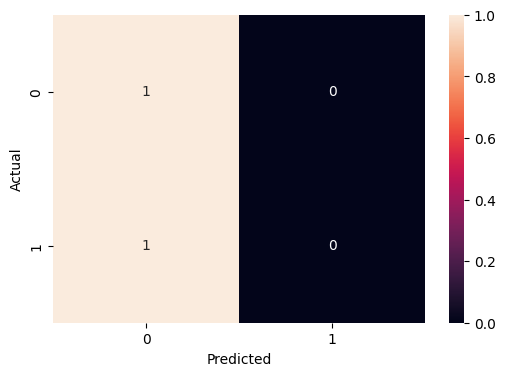

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
def predict_sentiment(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100)
    pred = model.predict(pad)
    return le.inverse_transform([np.argmax(pred)])

predict_sentiment("I love this project")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


array(['negative'], dtype=object)

In [17]:
model.save('/content/lstm_model.keras')



In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


ValueError: Invalid dtype: object

In [19]:
print(type(y_test))
print(y_test.dtype)
print(y_test[:5])


<class 'pandas.core.series.Series'>
int64
8    1
1    0
Name: label, dtype: int64


In [21]:
print(type(X_train))
print(X_train.dtype)


<class 'pandas.core.series.Series'>
object


In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [31]:
df = pd.read_csv('/content/sentiment_dataset.csv')
df.head()


,text,sentiment
0,I love this product,positive
1,This is the worst experience ever,negative
2,"It is okay, not bad",neutral
3,Absolutely fantastic service,positive
4,I am very disappointed,negative


In [32]:
df.columns


Index(['text', 'sentiment'], dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])


In [36]:
max_words = 5000
max_length = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [37]:
X = np.array(padded_sequences, dtype=np.int32)
y = np.array(df['sentiment'], dtype=np.int32)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
print(X_train.dtype, y_train.dtype)
print(X_train.shape, y_train.shape)


int32 int32
(8, 100) (8,)


In [40]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    LSTM(128),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.0959 - val_accuracy: 0.0000e+00 - val_loss: 1.1046
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6667 - loss: 1.0867 - val_accuracy: 0.0000e+00 - val_loss: 1.1134
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5000 - loss: 1.0910 - val_accuracy: 0.0000e+00 - val_loss: 1.1127
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8333 - loss: 1.0778 - val_accuracy: 0.0000e+00 - val_loss: 1.1132
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8333 - loss: 1.0748 - val_accuracy: 0.0000e+00 - val_loss: 1.1158
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.6667 - loss: 1.0792 - val_accuracy: 0.0000e+00 - val_loss: 1.1147
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 0.8333 - loss: 1.0568 - val_accuracy: 0.0000e+00 - val_loss: 1.1139
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 1.0390 - val_acc

In [42]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


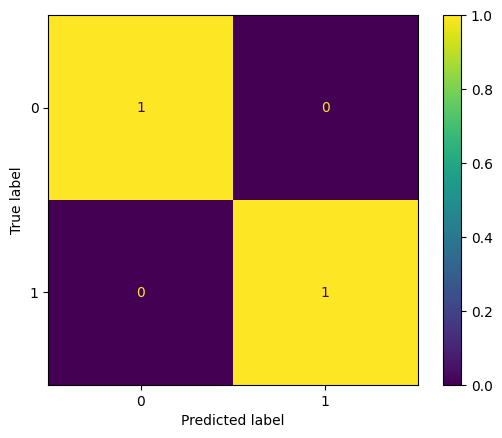

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


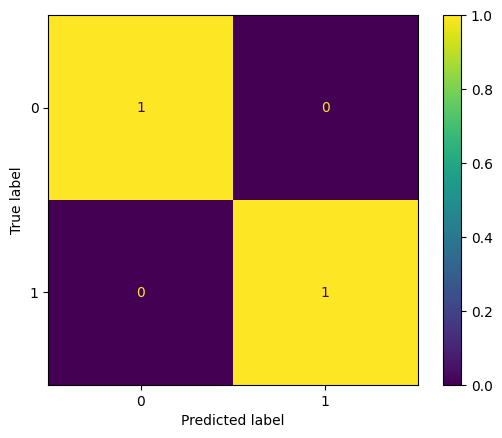

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [45]:
import pickle

with open('/content/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
